# Carregar dados

In [1]:
import pandas as pd

# # Mostrar mais colunas
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
pd.set_option('display.max_colwidth', 100)

df = pd.read_parquet("./output/gold/rais_TODOS_ANOS_comJoin_RAIS_VINC_PUB.parquet.gzip")

qnt_full = len(df)
print(f"""
Quantidade docs: {qnt_full}
""")

df.head(2)



Quantidade docs: 3034686



,ano,sigla_uf_id,regiao,regiao_id,sigla_uf,remuneracao_media,desligamento,idade,ocupacao_id,ocupacao,sexo_id,sexo,sigla_municipio
0,2015,0,Norte,2,AC,851.02,0,25,317205,Operador de Computador (Inclusive Microcomputador),1,Masculino,Rio Branco
1,2015,0,Norte,2,AC,882.55,0,21,317205,Operador de Computador (Inclusive Microcomputador),1,Masculino,Cruzeiro do Sul


In [2]:
# df.to_csv("./temp-ana.csv", index=False)

In [3]:
df[df["remuneracao_media"] > 0]["ano"].value_counts()
# df["ano"].value_counts()


2021    680910
2016    506777
2015    487646
2017    481971
2018    462175
2020    214433
2019    149064
Name: ano, dtype: int64

In [4]:
df_2019 = df[df["ano"] == 2019]
df_2020 = df[df["ano"] == 2020]

print(f"""
Quantidade
df_2019: {len(df_2019)}
df_2020: {len(df_2020)}
""")



Quantidade
df_2019: 162073
df_2020: 222102



# Verificando Dados Gerais

In [5]:
df.describe()

,ano,sigla_uf_id,regiao_id,remuneracao_media,desligamento,idade,ocupacao_id,sexo_id
count,3.034686e+06,3.034686e+06,3.034686e+06,3.034686e+06,3.034686e+06,3.034686e+06,3.034686e+06,3.034686e+06
mean,2.017899e+03,1.866463e+01,2.683329e+00,5.239106e+03,6.757889e-01,3.371349e+01,2.464659e+05,1.198092e+00
std,2.164120e+00,7.194417e+00,1.124644e+00,4.984381e+03,4.680794e-01,9.452344e+00,4.907436e+04,3.985622e-01
min,2.015000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,2.122050e+05,1.000000e+00
25%,2.016000e+03,1.300000e+01,3.000000e+00,1.974483e+03,0.000000e+00,2.700000e+01,2.124050e+05,1.000000e+00
50%,2.018000e+03,2.200000e+01,3.000000e+00,3.645090e+03,1.000000e+00,3.200000e+01,2.124150e+05,1.000000e+00
75%,2.020000e+03,2.500000e+01,3.000000e+00,6.945950e+03,1.000000e+00,3.900000e+01,3.171100e+05,1.000000e+00
max,2.021000e+03,2.600000e+01,4.000000e+00,1.614076e+05,1.000000e+00,9.700000e+01,3.172100e+05,2.000000e+00


# Dados por Estado, Sexo

In [6]:
# graf_sigla_uf = df[["sigla_uf"]].value_counts(ascending=True).plot(kind="barh", 
#                                                                    figsize=(15, 10), 
#                                                                    title="Quantidade de profissionais por UF")
# graf_sigla_uf.get_figure().savefig("./output/gold/graf_sigla_uf.png")

In [7]:
# graf_sexo = df[["sexo"]].value_counts(ascending=True).plot(kind="barh", 
#                                                                    figsize=(10, 8), 
#                                                                    title="Sexo")
# graf_sexo.get_figure().savefig("./output/gold/graf_sexo.png")


# Analisando

## Quantidade de Profissionais de TI de 2018 a 2021

In [8]:
# show df grouping by ano, and from this, show the group by sexo
df.groupby(["ano", "sexo"]).size().reset_index(name="qnt")

,ano,sexo,qnt
0,2015,Feminino,91576
1,2015,Masculino,400428
2,2016,Feminino,100733
3,2016,Masculino,411772
4,2017,Feminino,89452
5,2017,Masculino,397716
6,2018,Feminino,101658
7,2018,Masculino,365194
8,2019,Feminino,25888
9,2019,Masculino,136185


### Salários

Por: ANO 2019, Sexo, Região

In [9]:
# df_ana = df_2019[["sigla_uf", "desligamento", "ocupacao", "sexo", "remuneracao_media"]]
# df_ana = df_2020[["sigla_uf", "desligamento", "ocupacao", "sexo", "regiao", "remuneracao_media"]]
df_ana = df[["sigla_uf", "ano", "desligamento", "ocupacao", "sexo", "regiao", "remuneracao_media"]]
df_ana


,sigla_uf,ano,desligamento,ocupacao,sexo,regiao,remuneracao_media
0,AC,2015,0,Operador de Computador (Inclusive Microcomputador),Masculino,Norte,851.02
1,AC,2015,0,Operador de Computador (Inclusive Microcomputador),Masculino,Norte,882.55
2,AC,2015,0,Analista de Redes e de Comunicacao de Dados,Masculino,Norte,390.74
3,AC,2015,0,Analista de Suporte Computacional,Masculino,Norte,1640.39
4,AC,2015,0,Programador de Sistemas de Informacao,Masculino,Norte,901.99
...,...,...,...,...,...,...,...
3034681,RS,2021,1,Analista de Desenvolvimento de Sistemas,Feminino,Sul,10415.10
3034682,RS,2021,1,Analista de Desenvolvimento de Sistemas,Feminino,Sul,9932.69
3034683,RS,2021,1,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),Feminino,Sul,777.17
3034684,RS,2021,1,Programador de Sistemas de Informacao,Feminino,Sul,6421.08


In [10]:
df_ana["ano"].value_counts()


2021    691982
2016    512505
2015    492004
2017    487168
2018    466852
2020    222102
2019    162073
Name: ano, dtype: int64

# Remun. Média

In [11]:
df_ana = df_ana[df["remuneracao_media"] > 0]

In [12]:
def gerar_estaticas(df, cols_agg=["ano", "sexo"], col_estat="remuneracao_media", new_col_estat=["min", "max", "std", "mean"]):
  df_c = df.copy()

  df_c = df_c.groupby(cols_agg).agg(
      {col_estat: new_col_estat})

  # round values to 2 decimal places
  df_c = df_c.round(2)

  col_estat_dif = new_col_estat[-1]

  # add a col with difference in percentual between rows of col mea
  df_c["dif_m"] = df_c[col_estat][col_estat_dif] - \
      df_c[col_estat][col_estat_dif].shift(1)

  df_c["dif_m"][::2] = 0
  df_c["dif_m"] = df_c["dif_m"].round(2)

  # create col dif_p as dif_m in percentual
  df_c["dif_p"] = df_c["dif_m"] / \
      df_c[col_estat][col_estat_dif].shift(1) * 100

  df_c["dif_p"] = df_c["dif_p"].round(2)

  # new col with diff as percentage
  df_c["dif_p"] = df_c["dif_p"].astype(str) + "%"

  # Removendo valores desnecessários
  df_c["dif_m"] = df_c["dif_m"].astype(str)
  df_c["dif_m"] = df_c["dif_m"].replace("0.0", "")

  df_c["dif_p"] = df_c["dif_p"].replace("nan%", "")
  df_c["dif_p"] = df_c["dif_p"].replace("0.0%", "")

  # align all columns in one row
  df_c.columns = df_c.columns.map('_'.join)

  # remove the text "remuneracao_" from columns names
  df_c.columns = df_c.columns.str.replace(col_estat +"_", "")
  df_c.columns = df_c.columns.str.replace("_", "")

  return df_c

df_ana_r = gerar_estaticas(df_ana, new_col_estat=["mean"])
df_ana_r

C:\Users\marce\AppData\Local\Temp\ipykernel_21836\1056055417.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["dif_m"][::2] = 0


mean    difm    difp
ano  sexo                              
2015 Feminino   4704.23                
     Masculino  4857.87  153.64   3.27%
2016 Feminino   4931.81                
     Masculino  5231.93  300.12   6.09%
2017 Feminino   5290.40                
     Masculino  5538.30   247.9   4.69%
2018 Feminino   4592.03                
     Masculino  5526.76  934.73  20.36%
2019 Feminino   5526.83                
     Masculino  5533.10    6.27   0.11%
2020 Feminino   4007.78                
     Masculino  4908.28   900.5  22.47%
2021 Feminino   5144.01                
     Masculino  6027.07  883.06  17.17%

In [13]:

df_ana_r = gerar_estaticas(
    df_ana, cols_agg=["ano", "regiao", "sexo"], new_col_estat=["mean"])
df_ana_r


C:\Users\marce\AppData\Local\Temp\ipykernel_21836\1056055417.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["dif_m"][::2] = 0


mean     difm     difp
ano  regiao       sexo                                 
2015 Centro-Oeste Feminino    6273.33                  
                  Masculino   6059.88  -213.45    -3.4%
     Nordeste     Feminino    3603.36                  
                  Masculino   3401.19  -202.17   -5.61%
     Norte        Feminino    3340.62                  
                  Masculino   3620.97   280.35    8.39%
     Sudeste      Feminino    4889.10                  
                  Masculino   5168.85   279.75    5.72%
     Sul          Feminino    3862.81                  
                  Masculino   4175.08   312.27    8.08%
2016 Centro-Oeste Feminino    5886.73                  
                  Masculino   6257.95   371.22    6.31%
     Nordeste     Feminino    3619.23                  
                  Masculino   3624.03      4.8    0.13%
     Norte        Feminino    4017.91                  
                  Masculino   3882.29  -135.62   -3.38%
     Sudeste      Feminino    5157.91                  
                  Masculino   5560.43   402.52     7.8%
     Sul          Feminino    4221.08                  
                  Masculino   4586.88    365.8    8.67%
2017 Centro-Oeste Feminino    7418.53                  
                  Masculino   7159.41  -259.12   -3.49%
     Nordeste     Feminino    4098.84                  
                  Masculino   3956.29  -142.55   -3.48%
     Norte        Feminino    4362.55                  
                  Masculino   4165.20  -197.35   -4.52%
     Sudeste      Feminino    5256.01                  
                  Masculino   5808.55   552.54   10.51%
     Sul          Feminino    4797.92                  
                  Masculino   4802.75     4.83     0.1%
2018 Centro-Oeste Feminino    6979.09                  
                  Masculino   6801.06  -178.03   -2.55%
     Nordeste     Feminino    4247.12                  
                  Masculino   4044.22   -202.9   -4.78%
     Norte        Feminino    2859.67                  
                  Masculino   4024.01  1164.34   40.72%
     Sudeste      Feminino    5256.70                  
                  Masculino   5985.95   729.25   13.87%
     Sul          Feminino    4767.86                  
                  Masculino   4996.56    228.7     4.8%
2019 Centro-Oeste Feminino   10576.11                  
                  Masculino   9612.65  -963.46   -9.11%
     Nordeste     Feminino    2848.94                  
                  Masculino   3677.29   828.35   29.08%
     Norte        Feminino    3390.81                  
                  Masculino   3260.72  -130.09   -3.84%
     Sudeste      Feminino    5271.16                  
                  Masculino   5377.40   106.24    2.02%
     Sul          Feminino    3905.04                  
                  Masculino   4250.18   345.14    8.84%
2020 Centro-Oeste Feminino    4287.08                  
                  Masculino   6337.51  2050.43   47.83%
     Nordeste     Feminino    3161.25                  
                  Masculino   3481.98   320.73   10.15%
     Norte        Feminino    3741.41                  
                  Masculino   3161.25  -580.16  -15.51%
     Sudeste      Feminino    4386.02                  
                  Masculino   5285.72    899.7   20.51%
     Sul          Feminino    3275.24                  
                  Masculino   3942.60   667.36   20.38%
2021 Centro-Oeste Feminino    5426.14                  
                  Masculino   6782.73  1356.59    25.0%
     Nordeste     Feminino    4077.23                  
                  Masculino   4003.20   -74.03   -1.82%
     Norte        Feminino    4177.48                  
                  Masculino   4571.86   394.38    9.44%
     Sudeste      Feminino    5541.26                  
                  Masculino   6552.65  1011.39   18.25%
     Sul          Feminino    4097.54                  
                  Masculino   4981.30   883.76   21.57%

C:\Users\marce\AppData\Local\Temp\ipykernel_21836\1056055417.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["dif_m"][::2] = 0


<Axes: title={'center': 'Quantidade de profissionais por região e sexo'}, xlabel='Quantidade de profissionais', ylabel='Região e sexo'>

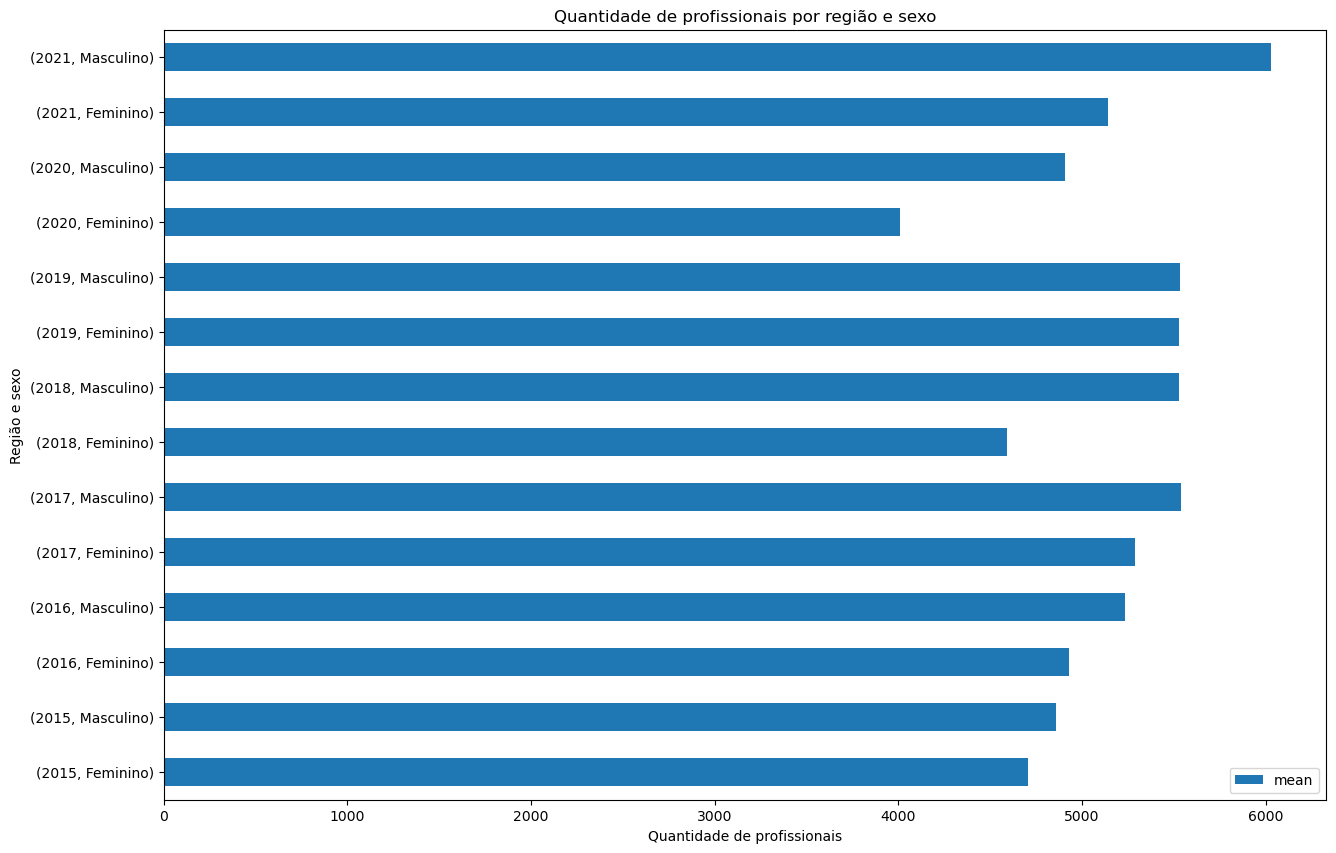

In [14]:
# plot a grapth of df_ana_d by ano and regiao
df_ana_r = gerar_estaticas(
    df_ana, cols_agg=["ano", "sexo"], new_col_estat=["mean"])

# cross table of the graph below
# df_ana_r = df_ana_r.T

df_ana_r.plot(kind="barh", figsize=(15, 10),
              title="Quantidade de profissionais por região e sexo",
              xlabel="Quantidade de profissionais",
              ylabel="Região e sexo")

In [15]:
# export to table in latex to 2 decimal places

# add hline to table
# df_ana_r.to_latex("./output/silver/df_ana_rm.tex", index=True, escape=True)

C:\Users\marce\AppData\Local\Temp\ipykernel_21836\2612461903.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_ana_r.to_latex("./output/silver/df_ana_rm.tex", index=True, escape=True)


# Demissões

In [16]:
df_ana_d = gerar_estaticas(
    df_ana, col_estat="desligamento", new_col_estat=["count"])
df_ana_d


C:\Users\marce\AppData\Local\Temp\ipykernel_21836\1056055417.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["dif_m"][::2] = 0


count       difm     difp
ano  sexo                                 
2015 Feminino    90527        nan         
     Masculino  397119   306592.0  338.67%
2016 Feminino    99166  -297953.0  -75.03%
     Masculino  407611   308445.0  311.04%
2017 Feminino    88159  -319452.0  -78.37%
     Masculino  393812   305653.0  346.71%
2018 Feminino   100452  -293360.0  -74.49%
     Masculino  361723   261271.0   260.1%
2019 Feminino    23601  -338122.0  -93.48%
     Masculino  125463   101862.0   431.6%
2020 Feminino    43081   -82382.0  -65.66%
     Masculino  171352   128271.0  297.74%
2021 Feminino   144658   -26694.0  -15.58%
     Masculino  536252   391594.0   270.7%

In [17]:

df_ana_d = gerar_estaticas(
    df_ana, cols_agg=["ano", "regiao", "sexo"], col_estat="desligamento", new_col_estat=["count"])

# replace col difm each even row with 0

# Removendo valores desnecessários
df_ana_d["difm"][::2] = 0
df_ana_d["difp"][::2] = 0

df_ana_d["difm"] = df_ana_d["difm"].astype(str)
df_ana_d["difm"] = df_ana_d["difm"].replace("0", "")

df_ana_d["difp"] = df_ana_d["difp"].astype(str)
df_ana_d["difp"] = df_ana_d["difp"].replace("0", "")

df_ana_d

C:\Users\marce\AppData\Local\Temp\ipykernel_21836\1056055417.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["dif_m"][::2] = 0
C:\Users\marce\AppData\Local\Temp\ipykernel_21836\3606761973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ana_d["difm"][::2] = 0
C:\Users\marce\AppData\Local\Temp\ipykernel_21836\3606761973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ana_d["difp"][::2] = 0


count      difm     difp
ano  regiao       sexo                                
2015 Centro-Oeste Feminino     8536                   
                  Masculino   32271   23735.0  278.06%
     Nordeste     Feminino    10125                   
                  Masculino   39713   29588.0  292.23%
     Norte        Feminino     2226                   
                  Masculino    9322    7096.0  318.78%
     Sudeste      Feminino    57863                   
                  Masculino  247765  189902.0  328.19%
     Sul          Feminino    11777                   
                  Masculino   68048   56271.0   477.8%
2016 Centro-Oeste Feminino    10738                   
                  Masculino   35731   24993.0  232.75%
     Nordeste     Feminino     9861                   
                  Masculino   39150   29289.0  297.02%
     Norte        Feminino     2232                   
                  Masculino    8936    6704.0  300.36%
     Sudeste      Feminino    62960                   
                  Masculino  253930  190970.0  303.32%
     Sul          Feminino    13375                   
                  Masculino   69864   56489.0  422.35%
2017 Centro-Oeste Feminino    10287                   
                  Masculino   39420   29133.0   283.2%
     Nordeste     Feminino     9444                   
                  Masculino   38815   29371.0   311.0%
     Norte        Feminino     2339                   
                  Masculino    9536    7197.0   307.7%
     Sudeste      Feminino    52563                   
                  Masculino  234344  181781.0  345.83%
     Sul          Feminino    13526                   
                  Masculino   71697   58171.0  430.07%
2018 Centro-Oeste Feminino     7475                   
                  Masculino   27762   20287.0   271.4%
     Nordeste     Feminino     7886                   
                  Masculino   35368   27482.0  348.49%
     Norte        Feminino    27383                   
                  Masculino   31209    3826.0   13.97%
     Sudeste      Feminino    45345                   
                  Masculino  207928  162583.0  358.55%
     Sul          Feminino    12363                   
                  Masculino   59456   47093.0  380.92%
2019 Centro-Oeste Feminino     3135                   
                  Masculino   16455   13320.0  424.88%
     Nordeste     Feminino     1796                   
                  Masculino    9765    7969.0  443.71%
     Norte        Feminino      801                   
                  Masculino    1722     921.0  114.98%
     Sudeste      Feminino    14399                   
                  Masculino   70987   56588.0   393.0%
     Sul          Feminino     3470                   
                  Masculino   26534   23064.0  664.67%
2020 Centro-Oeste Feminino     3001                   
                  Masculino   15757   12756.0  425.06%
     Nordeste     Feminino     3939                   
                  Masculino   17567   13628.0  345.98%
     Norte        Feminino     4031                   
                  Masculino    4085      54.0    1.34%
     Sudeste      Feminino    24390                   
                  Masculino  103504   79114.0  324.37%
     Sul          Feminino     7720                   
                  Masculino   30439   22719.0  294.29%
2021 Centro-Oeste Feminino     8182                   
                  Masculino   39322   31140.0  380.59%
     Nordeste     Feminino    11678                   
                  Masculino   45432   33754.0  289.04%
     Norte        Feminino     2231                   
                  Masculino   12326   10095.0  452.49%
     Sudeste      Feminino    97366                   
                  Masculino  343299  245933.0  252.59%
     Sul          Feminino    25201                   
                  Masculino   95873   70672.0  280.43%

In [18]:

df_ana_d.to_latex("./output/silver/df_ana_dm.tex", index=True, escape=True)


C:\Users\marce\AppData\Local\Temp\ipykernel_21836\3062245318.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_ana_d.to_latex("./output/silver/df_ana_dm.tex", index=True, escape=True)


<Axes: title={'center': 'Quantidade de desligamentos por ano e região'}, ylabel='ano,regiao,sexo'>

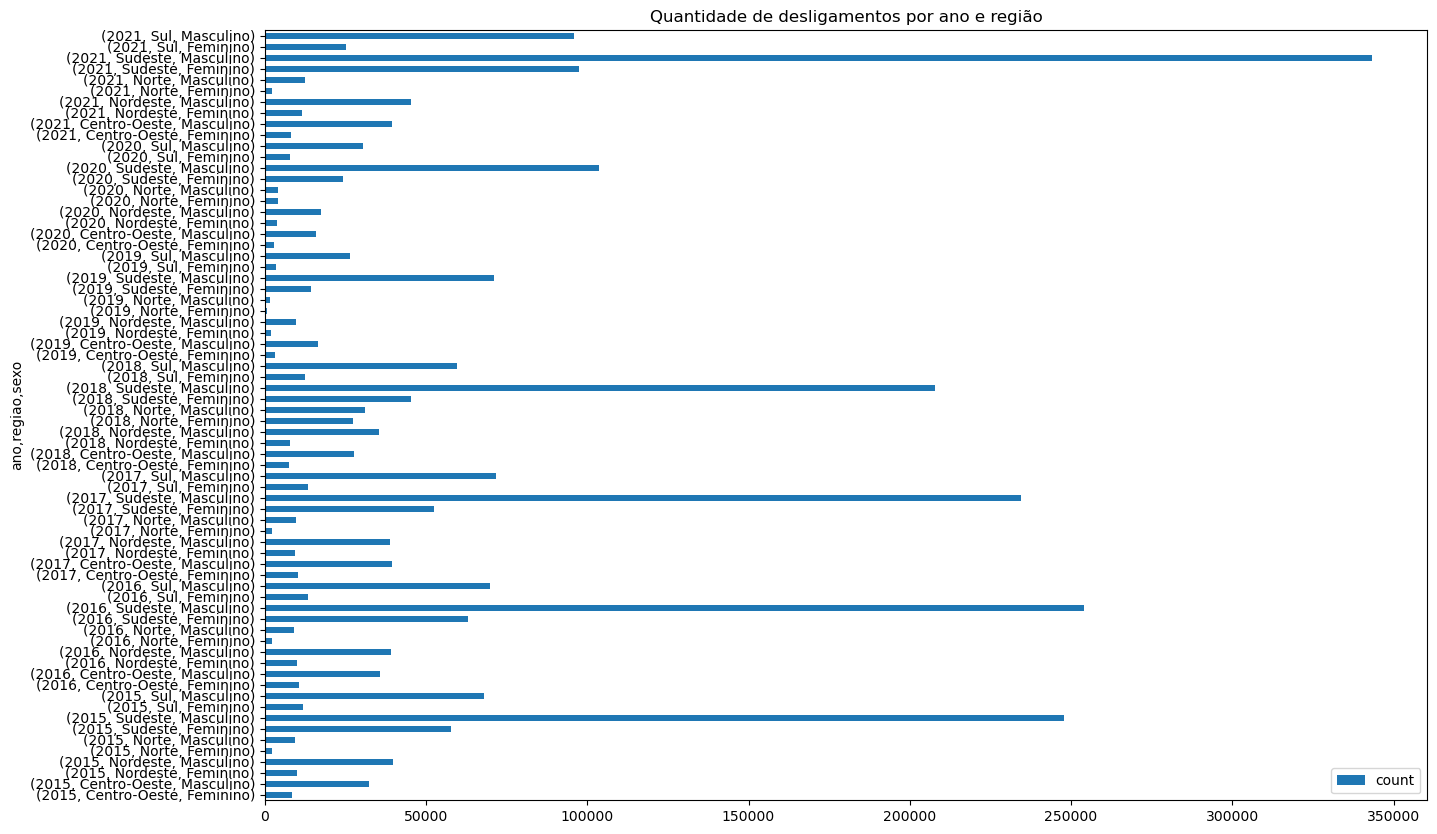

In [19]:
# plot a grapth of df_ana_d by ano and regiao
df_ana_d.plot(kind="barh", figsize=(15, 10),
              title="Quantidade de desligamentos por ano e região")


In [20]:
df_ana.head(2)

,sigla_uf,ano,desligamento,ocupacao,sexo,regiao,remuneracao_media
0,AC,2015,0,Operador de Computador (Inclusive Microcomputador),Masculino,Norte,851.02
1,AC,2015,0,Operador de Computador (Inclusive Microcomputador),Masculino,Norte,882.55


C:\Users\marce\AppData\Local\Temp\ipykernel_21836\3897802445.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=.5)


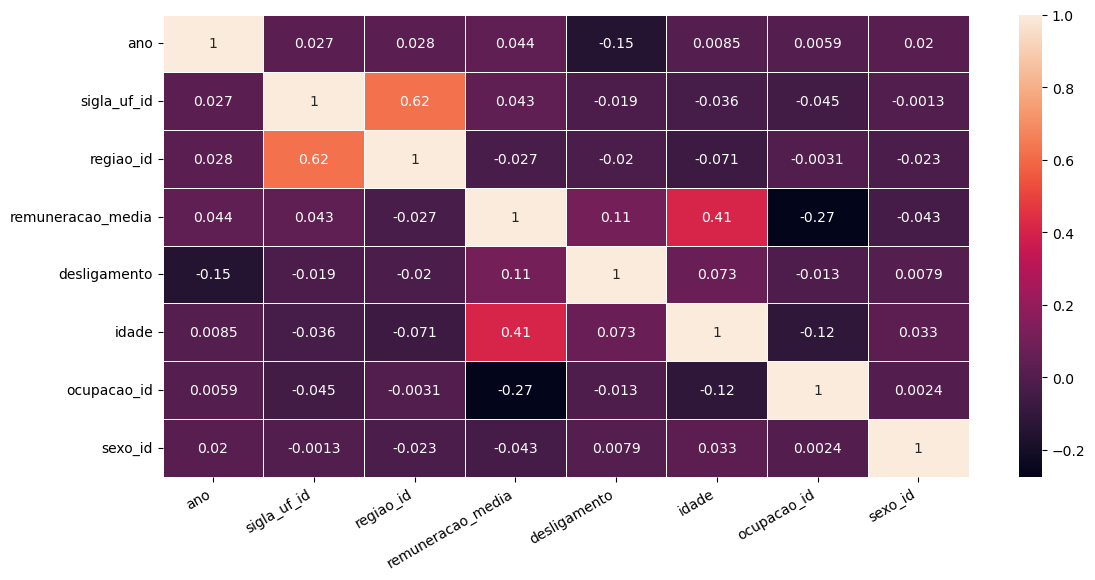

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()


In [22]:
# group df_ana_r by sigla_uf and add a column with mean, max, min, std
df_ana_dm = df_ana.groupby(["ano", "regiao", "sexo"]).agg(
    {"desligamento": ["count"]}).copy()

# round values to 2 decimal places
df_ana_dm = df_ana_dm.round(2)

df_ana_dm


desligamento
                                   count
ano  regiao       sexo                  
2015 Centro-Oeste Feminino          8536
                  Masculino        32271
     Nordeste     Feminino         10125
                  Masculino        39713
     Norte        Feminino          2226
                  Masculino         9322
     Sudeste      Feminino         57863
                  Masculino       247765
     Sul          Feminino         11777
                  Masculino        68048
2016 Centro-Oeste Feminino         10738
                  Masculino        35731
     Nordeste     Feminino          9861
                  Masculino        39150
     Norte        Feminino          2232
                  Masculino         8936
     Sudeste      Feminino         62960
                  Masculino       253930
     Sul          Feminino         13375
                  Masculino        69864
2017 Centro-Oeste Feminino         10287
                  Masculino        39420
     Nordeste     Feminino          9444
                  Masculino        38815
     Norte        Feminino          2339
                  Masculino         9536
     Sudeste      Feminino         52563
                  Masculino       234344
     Sul          Feminino         13526
                  Masculino        71697
2018 Centro-Oeste Feminino          7475
                  Masculino        27762
     Nordeste     Feminino          7886
                  Masculino        35368
     Norte        Feminino         27383
                  Masculino        31209
     Sudeste      Feminino         45345
                  Masculino       207928
     Sul          Feminino         12363
                  Masculino        59456
2019 Centro-Oeste Feminino          3135
                  Masculino        16455
     Nordeste     Feminino          1796
                  Masculino         9765
     Norte        Feminino           801
                  Masculino         1722
     Sudeste      Feminino         14399
                  Masculino        70987
     Sul          Feminino          3470
                  Masculino        26534
2020 Centro-Oeste Feminino          3001
                  Masculino        15757
     Nordeste     Feminino          3939
                  Masculino        17567
     Norte        Feminino          4031
                  Masculino         4085
     Sudeste      Feminino         24390
                  Masculino       103504
     Sul          Feminino          7720
                  Masculino        30439
2021 Centro-Oeste Feminino          8182
                  Masculino        39322
     Nordeste     Feminino         11678
                  Masculino        45432
     Norte        Feminino          2231
                  Masculino        12326
     Sudeste      Feminino         97366
                  Masculino       343299
     Sul          Feminino         25201
                  Masculino        95873

In [23]:
# group df_ana_r by sigla_uf and add a column with mean, max, min, std
df_ana_dm = df_ana.groupby(["regiao", "sexo"]).agg(
    {"desligamento": ["count"]}).copy()

# round values to 2 decimal places
df_ana_dm = df_ana_dm.round(2)

df_ana_dm


desligamento
                              count
regiao       sexo                  
Centro-Oeste Feminino         51354
             Masculino       206718
Nordeste     Feminino         54729
             Masculino       225810
Norte        Feminino         41243
             Masculino        77136
Sudeste      Feminino        354886
             Masculino      1461757
Sul          Feminino         87432
             Masculino       421911

In [24]:
# add a col with difference in percentual between rows of col mean
df_ana_dm["diff"] = df_ana_dm["desligamento"]["count"].diff(
) / df_ana_dm["desligamento"]["count"] * 100

df_ana_dm["diff"] = df_ana_dm["diff"].round(2)

pd.set_option('mode.chained_assignment', None)  # remove warning
df_ana_dm["diff"][::2] = 0

df_ana_dm


desligamento     diff
                              count         
regiao       sexo                           
Centro-Oeste Feminino         51354      NaN
             Masculino       206718    75.16
Nordeste     Feminino         54729  -277.71
             Masculino       225810    75.76
Norte        Feminino         41243  -447.51
             Masculino        77136    46.53
Sudeste      Feminino        354886    78.26
             Masculino      1461757    75.72
Sul          Feminino         87432 -1571.88
             Masculino       421911    79.28

In [25]:
# group df_ana_r by sigla_uf and add a column with mean, max, min, std
df_ana_dm = df_ana.groupby(["ano", "sexo"]).agg(
    {"desligamento": ["count"]}).copy()

# round values to 2 decimal places
df_ana_dm = df_ana_dm.round(2)

# Add column with cumulative from count by ano and zero each even row
df_ana_dm["cumsum"] = df_ana_dm["desligamento"]["count"].cumsum()

df_ana_dm
# df_ana_dm[df_ana_dm["ano"] == "2018"]


desligamento   cumsum
                      count         
ano  sexo                           
2015 Feminino         90527    90527
     Masculino       397119   487646
2016 Feminino         99166   586812
     Masculino       407611   994423
2017 Feminino         88159  1082582
     Masculino       393812  1476394
2018 Feminino        100452  1576846
     Masculino       361723  1938569
2019 Feminino         23601  1962170
     Masculino       125463  2087633
2020 Feminino         43081  2130714
     Masculino       171352  2302066
2021 Feminino        144658  2446724
     Masculino       536252  2982976

In [26]:
# export to table in latex to 2 decimal places
# df_ana_dm.reset_index().to_latex("./output/silver/df_ana_dm.tex", index=False)


C:\Users\marce\AppData\Local\Temp\ipykernel_21836\1904170663.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_ana_dm.reset_index().to_latex("./output/silver/df_ana_dm.tex", index=False)


# Cargos

In [27]:
# from df_ana, count the number of ocupacao by sexo
df_ana.groupby(["ocupacao", "sexo"]).size().reset_index()


,ocupacao,sexo,0
0,Administrador de Banco de Dados,Feminino,5846
1,Administrador de Banco de Dados,Masculino,22700
2,Administrador de Redes,Feminino,4037
3,Administrador de Redes,Masculino,37425
4,Administrador de Sistemas Operacionais,Feminino,11400
5,Administrador de Sistemas Operacionais,Masculino,39379
6,Administrador em Segurança da Informação,Feminino,3846
7,Administrador em Segurança da Informação,Masculino,16686
8,Analista de Desenvolvimento de Sistemas,Feminino,208094
9,Analista de Desenvolvimento de Sistemas,Masculino,858031


In [28]:
# df_ana["diff"] = df_ana["remuneracao_media"].diff()
df_temp = df_ana.groupby(["ocupacao", "sexo"]).size().reset_index()
# create a new column with the difference between the current row and the previous row
df_temp["diff"] = df_temp[0].diff()

df_temp


,ocupacao,sexo,0,diff
0,Administrador de Banco de Dados,Feminino,5846,NaN
1,Administrador de Banco de Dados,Masculino,22700,16854.0
2,Administrador de Redes,Feminino,4037,-18663.0
3,Administrador de Redes,Masculino,37425,33388.0
4,Administrador de Sistemas Operacionais,Feminino,11400,-26025.0
5,Administrador de Sistemas Operacionais,Masculino,39379,27979.0
6,Administrador em Segurança da Informação,Feminino,3846,-35533.0
7,Administrador em Segurança da Informação,Masculino,16686,12840.0
8,Analista de Desenvolvimento de Sistemas,Feminino,208094,191408.0
9,Analista de Desenvolvimento de Sistemas,Masculino,858031,649937.0


In [29]:

df_temp.sort_values(by=["diff"], ascending=False)


,ocupacao,sexo,0,diff
9,Analista de Desenvolvimento de Sistemas,Masculino,858031,649937.0
15,Analista de Suporte Computacional,Masculino,411372,316099.0
31,Programador de Sistemas de Informacao,Masculino,367170,287926.0
8,Analista de Desenvolvimento de Sistemas,Feminino,208094,191408.0
33,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),Masculino,221028,163225.0
11,Analista de Redes e de Comunicacao de Dados,Masculino,145673,92861.0
23,Operador de Computador (Inclusive Microcomputador),Masculino,134053,85790.0
30,Programador de Sistemas de Informacao,Feminino,79244,70599.0
14,Analista de Suporte Computacional,Feminino,95273,53169.0
3,Administrador de Redes,Masculino,37425,33388.0


# Outros

In [30]:
# df_ana[df_ana["sigla_uf"].isin(REGIOES["Norte"])].describe()


In [31]:
# group df_ana by sigla_uf and show mean of valor_remuneracao_media

# df_ana.groupby(["sigla_uf", "sexo"]).mean().reset_index()

# Correlação entre colunas

- Correlação entre Ano, Estado, Idade, Ocupação, Sexo, Cor

In [32]:
# # https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas

# df_apenas_ids = df[[
#     "ano", "sigla_uf_id", "idade", "ocupacao_id", "sexo_id", "raca_cor_id"]]

# corr_an = df_apenas_ids.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# # corr_an = df_apenas_ids.corr()
# corr_an

Matriz de correlação: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between

In [33]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(13, 6))
# sns.heatmap(corr_an, vmax=1, annot=True, linewidths=.5)
# plt.xticks(rotation=30, horizontalalignment="right")
# plt.show()


In [34]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(df_apenas_ids, figsize=(12, 8))

